# IBM's Docling

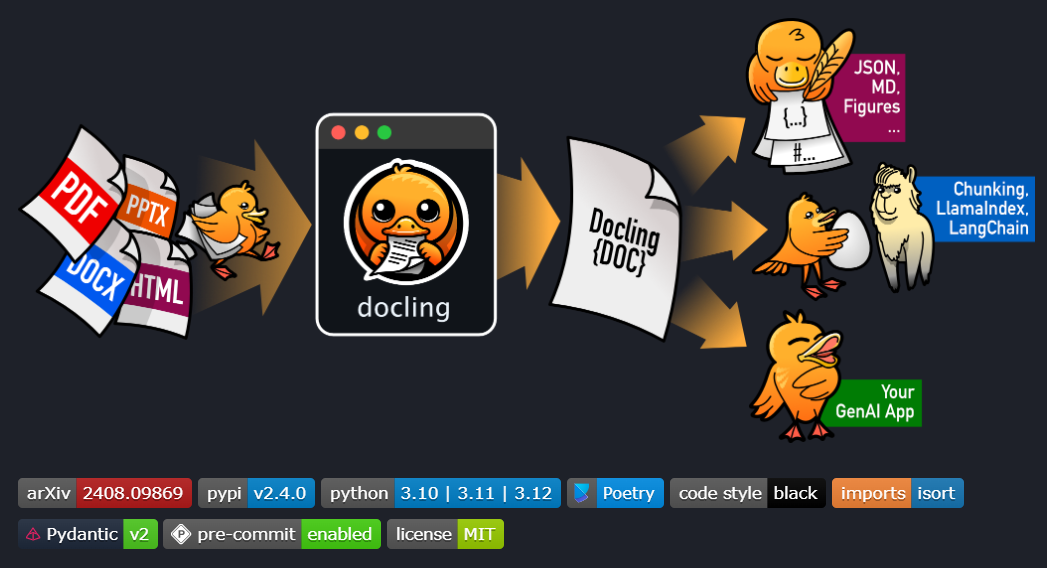

### Requirements 

```
 ! pip install docling
```


In [8]:
import os
import time
os.getcwd()

'/home/miguel/Challenge/data'

#### Create the Converter Instance

In [1]:
from docling.document_converter import DocumentConverter
converter = DocumentConverter()

#### File Conversion

From .docx (also pdf...) files to...

(1) .md

(2) .txt

(3) .json

(4) .doctags


In [12]:
rel14_docx = "./rel18/rel_14.docx"

start_time = time.time()
# most resource-intensive part
result = converter.convert(rel14_docx) # interprets the content and parsed to a structured format
end_time = time.time()
elapsed_time = end_time - start_time

# the structured format of DocumentConverter().convert allow to easy export to multiple formats
# so it only processes the document once
md_result = result.document.export_to_markdown()
txt_result = result.document.export_to_text()
json_result = result.document.export_to_dict()
doctags_result = result.document.export_to_document_tokens() # like the html tags of a Word (metadata of docx)

print(f"Time taken for conversion: {elapsed_time:.2f} seconds")

Time taken for conversion: 17.37 seconds


In [14]:
import json

doc_filename = result.input.file.stem

output_dir = "./docling_outputs"

# Export JSON format:
with open(os.path.join(output_dir, f"{doc_filename}.json"), "w", encoding="utf-8") as fp:
    fp.write(json.dumps(result.document.export_to_dict()))

# Export TXT format:
with open(os.path.join(output_dir, f"{doc_filename}.txt"), "w", encoding="utf-8") as fp:
    fp.write(result.document.export_to_text())

# Export Markdown format:
with open(os.path.join(output_dir, f"{doc_filename}.md"), "w", encoding="utf-8") as fp:
    fp.write(result.document.export_to_markdown())

# Export Document Tags format:
with open(os.path.join(output_dir, f"{doc_filename}.doctags"), "w", encoding="utf-8") as fp:
    fp.write(result.document.export_to_document_tokens())

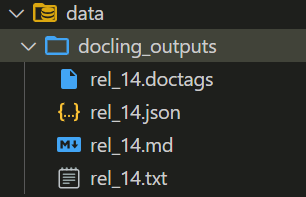

#### Chunking

In [16]:
from docling_core.transforms.chunker import HierarchicalChunker

sample_pdf = "./Non-deterministic nature of llms.pdf"
# most resource-intensive part
converted_result = converter.convert(sample_pdf) # interprets the content and parsed to a structured format

doc = converted_result.document

chunks = list(HierarchicalChunker().chunk(doc))

In [17]:
chunks

[DocChunk(text='martes, 23 de julio de 2024', meta=DocMeta(schema_name='docling_core.transforms.chunker.DocMeta', version='1.0.0', doc_items=[TextItem(self_ref='#/texts/1', parent=RefItem(cref='#/body'), children=[], label=<DocItemLabel.TEXT: 'text'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=71.51866912841797, t=776.280029296875, r=182.58921813964844, b=766.280029296875, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 27))], orig='martes, 23 de julio de 2024', text='martes, 23 de julio de 2024')], headings=['Non-deterministic nature of llms'], captions=None, origin=DocumentOrigin(mimetype='application/pdf', binary_hash=515540225521080764, filename='Non-deterministic nature of llms.pdf', uri=None))),
 DocChunk(text='8:42', meta=DocMeta(schema_name='docling_core.transforms.chunker.DocMeta', version='1.0.0', doc_items=[TextItem(self_ref='#/texts/2', parent=RefItem(cref='#/body'), children=[], label=<DocItemLabel.TEXT: 'text'>, prov=[ProvenanceItem(page_no=1, b

In [18]:
print(chunks[5])

text="(1) In addition to the inherent non -deterministic underlying architecture built in the core ethos of modern AI work.\n(2) At the end, models generate next tokens. We see the output as text but inside it is generatinga string of numbers and probabilities from the tokens distribution it can pick. For example, GPT-4 has 100,000 tokens it can choose from, so each result is the 100,000 list of model's probabilities to each possible token, selecting the top -k inherent in the configuration metric used." meta=DocMeta(schema_name='docling_core.transforms.chunker.DocMeta', version='1.0.0', doc_items=[ListItem(self_ref='#/texts/7', parent=RefItem(cref='#/groups/0'), children=[], label=<DocItemLabel.LIST_ITEM: 'list_item'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=71.43379974365234, t=611.3826293945312, r=580.6983642578125, b=584.5506591796875, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 117))], orig='(1) In addition to the inherent non -deterministic under

Docling Chunks' structured format:

```
{
  "text": "(1) In addition to the inherent non -deterministic underlying architecture built in the core ethos of modern AI work.\n(2) At the end, models generate next tokens. We see the output as text but inside it is generating a string of numbers and probabilities from the tokens distribution it can pick. For example, GPT-4 has 100,000 tokens it can choose from, so each result is the 100,000 list of model's probabilities to each possible token, selecting the top -k inherent in the configuration metric used.",
  "meta": {
    "schema_name": "docling_core.transforms.chunker.DocMeta",
    "version": "1.0.0",
    "doc_items": [
      {
        "self_ref": "#/texts/7",
        "parent": {
          "cref": "#/groups/0"
        },
        "children": [],
        "label": "list_item",
        "prov": [
          {
            "page_no": 1,
            "bbox": {
              "l": 71.43379974365234,
              "t": 611.3826293945312,
              "r": 580.6983642578125,
              "b": 584.5506591796875,
              "coord_origin": "BOTTOMLEFT"
            },
            "charspan": [0, 117]
          }
        ],
        "orig": "(1) In addition to the inherent non -deterministic underlying architecture built in the core ethos of modern AI work.",
        "text": "(1) In addition to the inherent non -deterministic underlying architecture built in the core ethos of modern AI work.",
        "enumerated": false,
        "marker": "-"
      },
      {
        "self_ref": "#/texts/8",
        "parent": {
          "cref": "#/groups/0"
        },
        "children": [],
        "label": "list_item",
        "prov": [
          {
            "page_no": 1,
            "bbox": {
              "l": 71.32141876220703,
              "t": 576.5599975585938,
              "r": 579.73388671875,
              "b": 509.5360107421875,
              "coord_origin": "BOTTOMLEFT"
            },
            "charspan": [0, 383]
          }
        ],
        "orig": "(2) At the end, models generate next tokens. We see the output as text but inside it is generating a string of numbers and probabilities from the tokens distribution it can pick. For example, GPT-4 has 100,000 tokens it can choose from, so each result is the 100,000 list of model's probabilities to each possible token, selecting the top -k inherent in the configuration metric used.",
        "text": "(2) At the end, models generate next tokens. We see the output as text but inside it is generating a string of numbers and probabilities from the tokens distribution it can pick. For example, GPT-4 has 100,000 tokens it can choose from, so each result is the 100,000 list of model's probabilities to each possible token, selecting the top -k inherent in the configuration metric used.",
        "enumerated": false,
        "marker": "-"
      }
    ],
    "headings": [
      "Why LLM's responses vary from time to time?"
    ],
    "captions": null,
    "origin": {
      "mimetype": "application/pdf",
      "binary_hash": 515540225521080764,
      "filename": "Non-deterministic nature of llms.pdf",
      "uri": null
    }
  }
}

```


#### Also OCR is possible

Testing a very easy OCR sample...


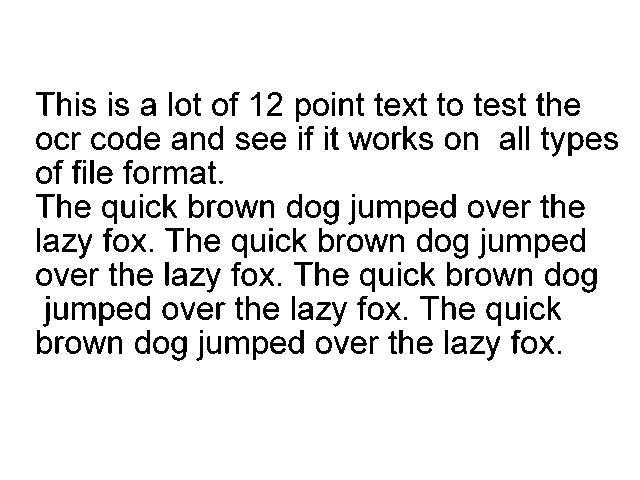

In [5]:
source = "./testocr.png"
ocr_result = converter.convert(source)
print(ocr_result.document.export_to_markdown())

This is a lot of 12 text to test the ocr code and see if it works on all types of file format. point

The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox.


Lets look at a more difficult handwriting OCR sample...

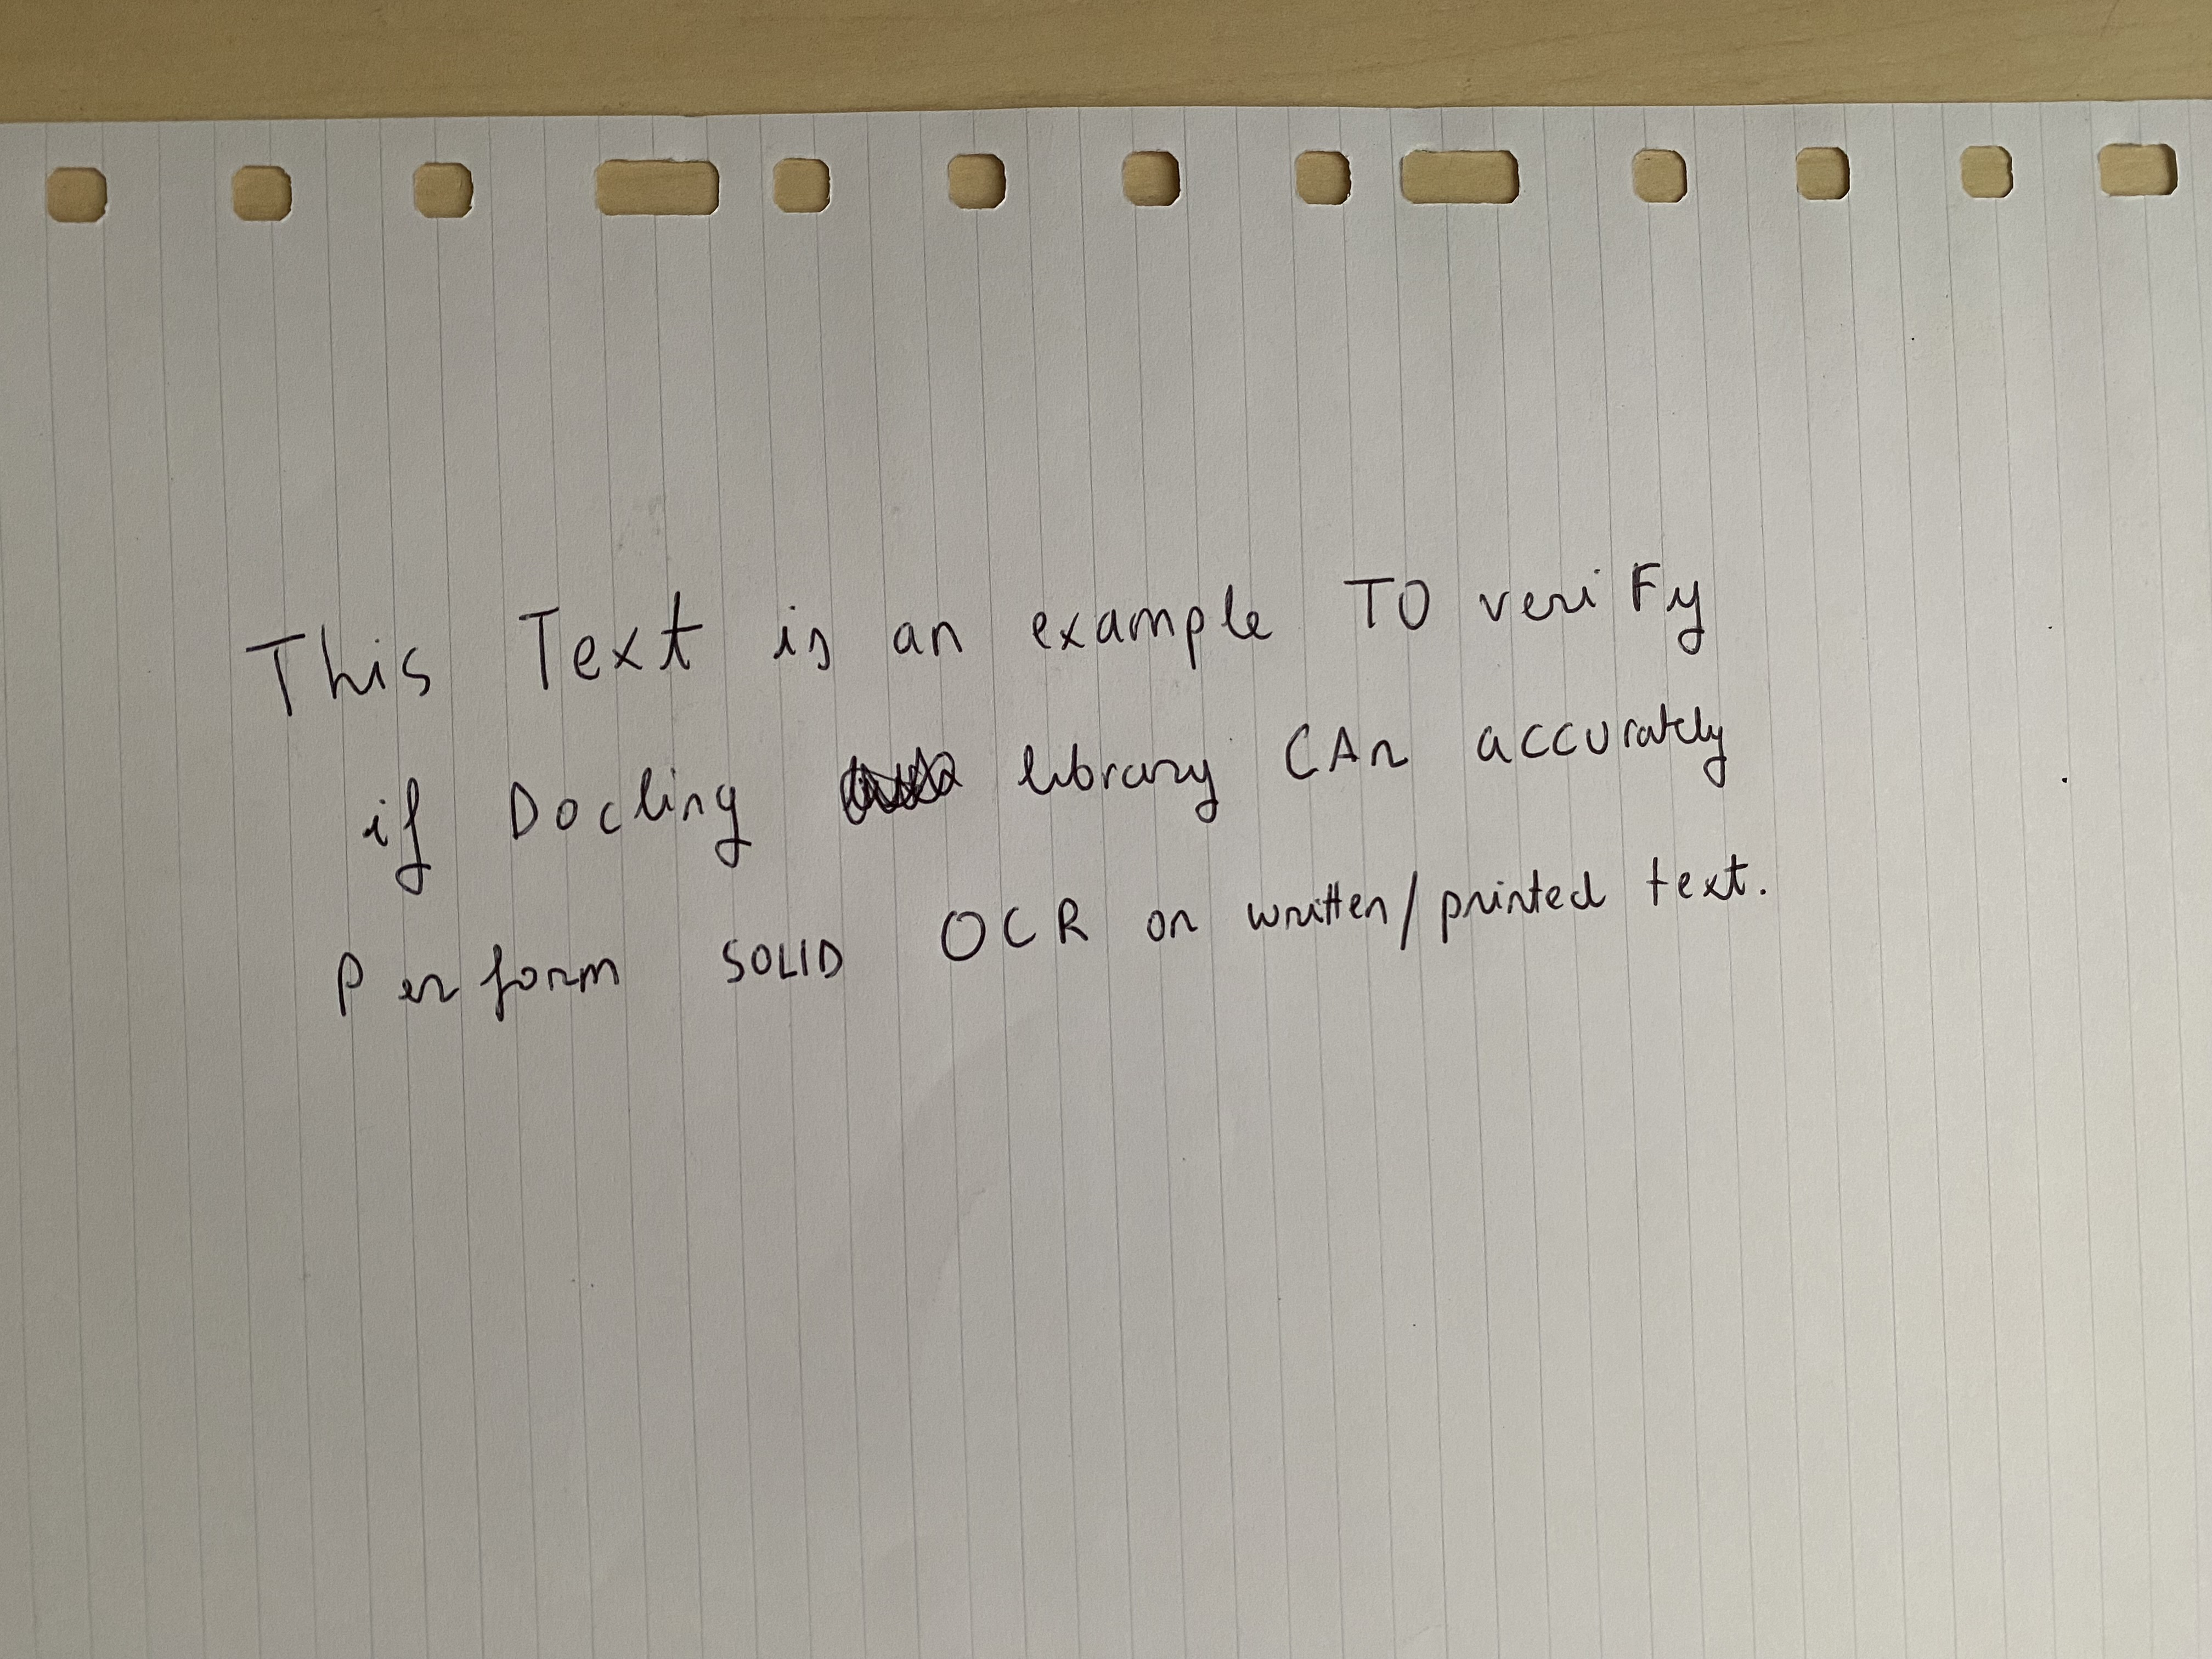

In [4]:
source = "./IMG_5460.png"
ocr_result = converter.convert(source)
print(ocr_result.document.export_to_markdown())

Tks

Tex&

a^

D0 € -

P . %nm

6a4

Solid

an

Qxamp l

Lbrany

0C R

Oa

To

Vuu

CAa

wmc#en

Fj

aCCu fahuy

Pninted

#ext .


So... The Docling library generally offers more accurate performance on printed text compared to handwriting in OCR.